# Calculating Betas Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns

%matplotlib inline

## 2. Create a Path to the File Using Pathlib.

In [2]:
# Set the file paths for the CSVs using the Path class from the pathlib library
msft_csv_path = Path("../Resources/MSFT.csv")
sp500_csv_path = Path("../Resources/SP500.csv")

## 3. Read the CSV into a Pandas DataFrame.

In [3]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
msft_df = pd.read_csv(msft_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df = pd.read_csv(sp500_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)

## 4. Combine DataFrames and Sort the Index

In [6]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined = pd.concat([msft_df, sp500_df], axis="columns", join='inner')

# Sort datetime index in ascending order (past to present)
combined.sort_index(ascending=False)

# Display a few rows
combined

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.680,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.800,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.290,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.370,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.260,40.26,39.8100,1911.910034
...,...,...,...,...,...,...
2019-05-13,123.35,33944920,124.110,125.55,123.0400,2811.870117
2019-05-14,124.73,25266320,123.870,125.88,123.7000,2834.409912
2019-05-15,126.02,24722710,124.260,126.71,123.7000,2850.959961


## 5. Drop Extraneous Columns

In [10]:
# Drop extra columns and only leave the close columns and associated values
combined.drop(columns = ["volume", "high", "low", "open"], inplace=True)

combined

KeyError: "['volume' 'high' 'low' 'open'] not found in axis"

## 6. Rename Columns

In [13]:
# Rename the columns to match the corresponding stock
combined.columns = ["MSFT", "SP500"]

combined

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 7. Calculate Daily Returns

In [15]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined.pct_change()

daily_returns

,MSFT,SP500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988
...,...,...
2019-05-13,-0.029733,-0.024131
2019-05-14,0.011188,0.008016
2019-05-15,0.010342,0.005839


## 8. Calculate Covariance of MSFT returns vs. S&P 500 returns

In [17]:
# Calculate covariance of all daily returns of MSFT vs. S&P 500
covariance = daily_returns["MSFT"].cov(daily_returns["SP500"])
covariance

9.084836971066263e-05

## 9. Calculate Variance of SP500 Returns

In [18]:
# Calculate variance of the S&P 500
variance = daily_returns["SP500"].var()
variance

7.030950113534627e-05

## 10. Calculate Beta of MSFT

In [19]:
# Calculate beta of all daily returns of MSFT
beta = covariance/variance

beta

1.2921208121755678

## 11. Calculate 30-Day Rolling Covariance of MSFT Returns vs. S&P 500 Returns

<AxesSubplot:xlabel='date'>

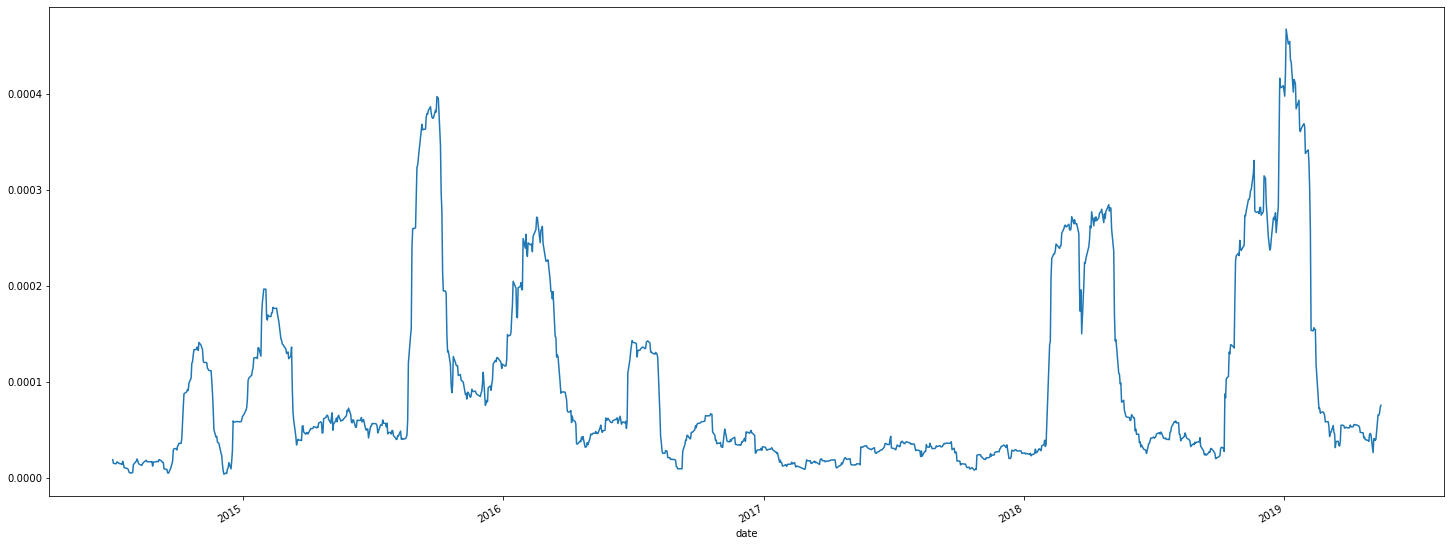

In [22]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
rolling_covariance = daily_returns["MSFT"].rolling(window=30).cov(daily_returns["SP500"])

rolling_covariance.plot(figsize=(25,10))

## 12. Calculate 30-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:xlabel='date'>

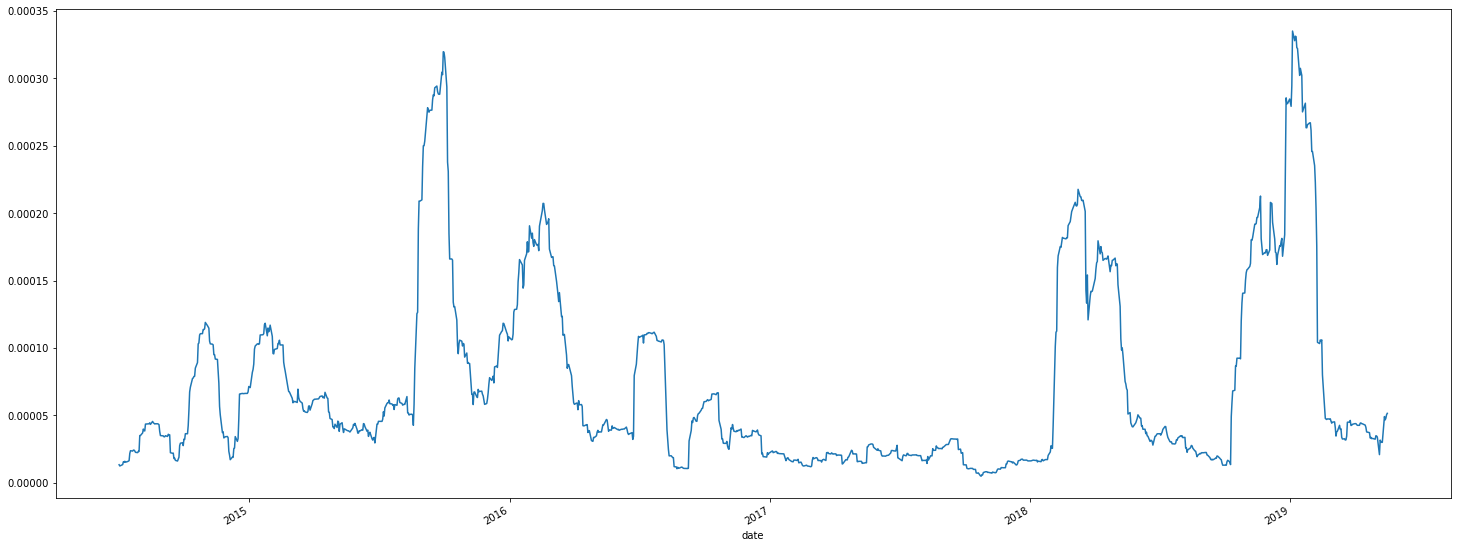

In [24]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = daily_returns["SP500"].rolling(window=30).var()

rolling_variance.plot(figsize=(25,10))

## 13. Calculate 30-Day Rolling Beta of MSFT

<AxesSubplot:xlabel='date'>

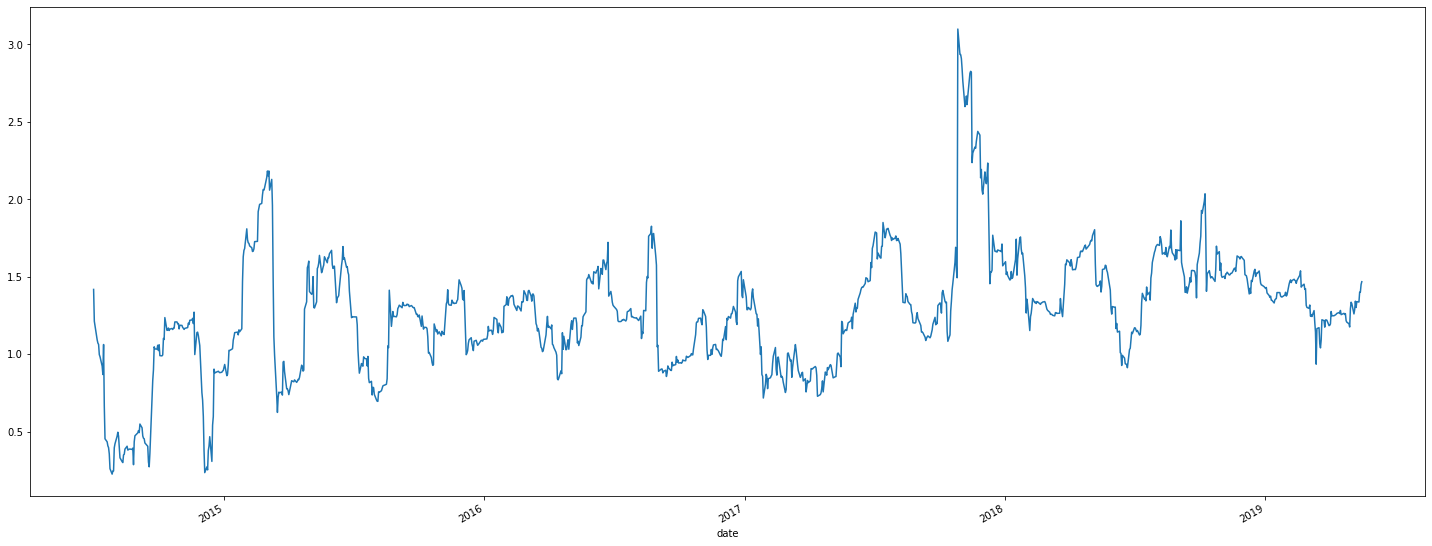

In [26]:
# Calculate 30-day rolling beta of MSFT and plot the data
rolling_beta = rolling_covariance/rolling_variance

rolling_beta.plot(figsize=(25,10))

## 14. Beta vs. Correlation

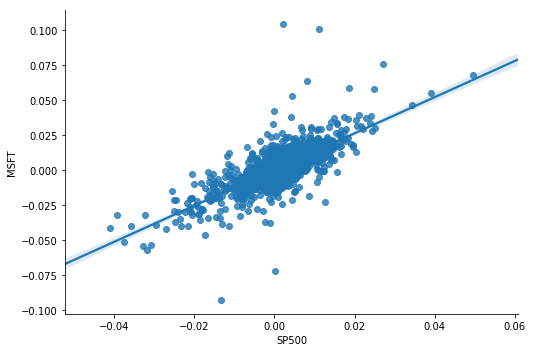

In [14]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot()